파일 읽기 성공 (utf-16)!
        date
0 2025-05-05
1 2025-05-05
2 2025-05-05
3 2025-05-05
4 2025-05-05
주(일요일 마감 기준)별 커밋 횟수:
date
2025-03-16     1
2025-03-23     0
2025-03-30     0
2025-04-06     0
2025-04-13    28
2025-04-20    48
2025-04-27    17
2025-05-04    22
2025-05-11     6
Freq: W-SUN, Name: commit_count, dtype: int64

DataFrame 형태로 변환된 결과:
  week_ending_date  commit_count
0       2025-03-16             1
1       2025-03-23             0
2       2025-03-30             0
3       2025-04-06             0
4       2025-04-13            28


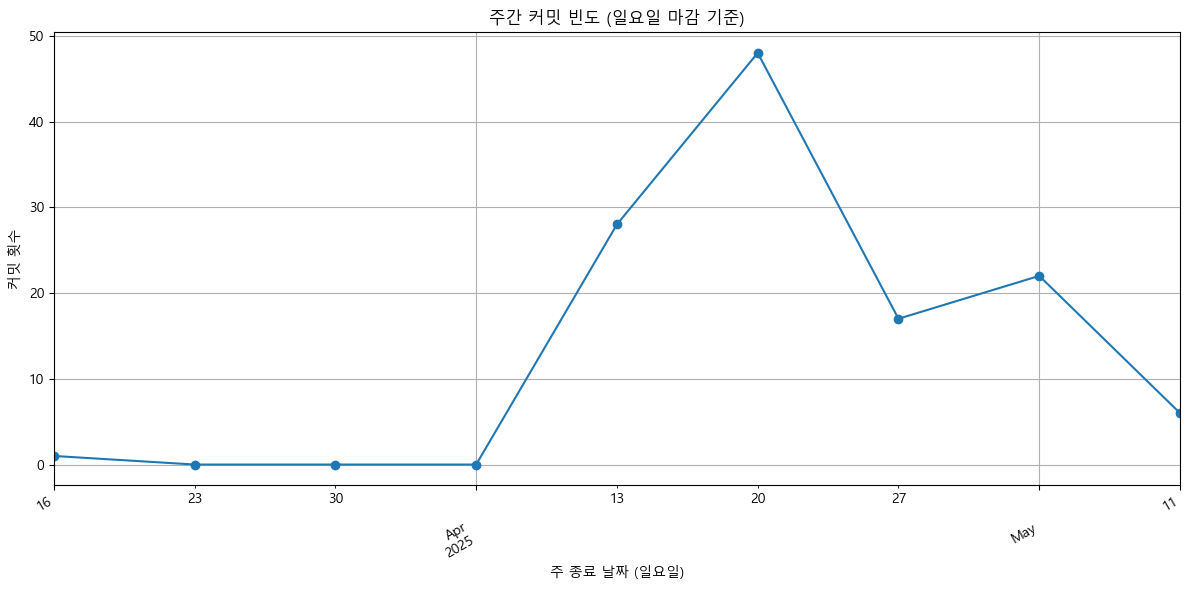

In [10]:
import pandas as pd

# UTF-16 인코딩으로 파일을 읽어옵니다.
commit_dates_df = pd.read_csv('commit_dates.txt', header=None, names=['date'], encoding='utf-16')

# 날짜 문자열을 datetime 객체로 변환합니다.
commit_dates_df['date'] = pd.to_datetime(commit_dates_df['date'])

print("파일 읽기 성공 (utf-16)!")
print(commit_dates_df.head())

# commit_counts_by_date = commit_dates_df.groupby(commit_dates_df['date'].dt.date).size()
#
# # 결과 확인 (Series 형태로 출력됨: index=날짜, value=커밋 횟수)
# print("날짜별 커밋 횟수:")
# print(commit_counts_by_date)
#
# # (선택 사항) 결과를 더 다루기 쉬운 DataFrame 형태로 변환하고 열 이름 지정
# commit_counts_df = commit_counts_by_date.reset_index()
# commit_counts_df.columns = ['commit_date', 'commit_count'] # 열 이름 변경
#
# print("\nDataFrame 형태로 변환된 결과:")
# print(commit_counts_df.head())

commit_counts_by_week = commit_dates_df.groupby(pd.Grouper(key='date', freq='W')).size()

# (Optional) Change week ending day, e.g., Monday:
# commit_counts_by_week_mon = commit_dates_df.groupby(pd.Grouper(key='date', freq='W-MON')).size()

# Rename the series
commit_counts_by_week.name = 'commit_count'

# Display the result (Series: index=week end date, value=commit count)
print("주(일요일 마감 기준)별 커밋 횟수:")
print(commit_counts_by_week)

# (Optional) Convert to DataFrame
commit_counts_by_week_df = commit_counts_by_week.reset_index()
commit_counts_by_week_df.columns = ['week_ending_date', 'commit_count']
print("\nDataFrame 형태로 변환된 결과:")
print(commit_counts_by_week_df.head())

# --- 시각화 코드 ---
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic)
# 시스템에 설치된 다른 한글 폰트 사용 가능
font_path = None
if plt.sys.platform == 'win32':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif plt.sys.platform == 'darwin': # macOS
    font_path = '/Library/Fonts/AppleGothic.ttf'
else: # Linux 등 (NanumGothic 등 설치 필요)
    # 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    # 사용 가능한 폰트 경로 확인 필요
    try:
        # 시스템에서 사용 가능한 한글 폰트 찾기 (예시)
        font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
        # Nanum 폰트가 있다면 우선 사용
        nanum_gothic = [f for f in font_list if 'NanumGothic' in f]
        if nanum_gothic:
            font_path = nanum_gothic[0]
        else: # 다른 사용 가능한 폰트 (첫번째 ttf 폰트) - 없을 수도 있음
             if font_list: font_path = font_list[0]
    except:
        pass # 폰트 못찾으면 기본 폰트로

if font_path:
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False
else:
    print("한글 폰트를 찾을 수 없습니다. 그래프의 한글이 깨질 수 있습니다.")

plt.figure(figsize=(12, 6)) # 그래프 크기 설정

# 라인 플롯 생성 (Series 객체에서 바로 plot 호출)
commit_counts_by_week.plot(kind='line', marker='o', linestyle='-')
# marker='o': 각 데이터 포인트를 원으로 표시
# linestyle='-': 선 스타일 (실선)

# 그래프 제목 및 축 레이블 설정 (한글)
plt.title('주간 커밋 빈도 (일요일 마감 기준)')
plt.xlabel('주 종료 날짜 (일요일)')
plt.ylabel('커밋 횟수')

# 그리드(격자) 표시
plt.grid(True)

# x축 레이블 회전 (필요에 따라 각도 조절)
plt.xticks(rotation=30, ha='right')

# 레이아웃 자동 조정 (제목, 레이블 등이 겹치지 않도록)
plt.tight_layout()

# 그래프 보여주기
plt.show()